## Exploration of the feasability of the Project

### We want to build a ML model that is profitable in theory

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-11-20',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [27]:
len(stock_data)


474

In [28]:
#Ideas from Medium
# Feature engineering: Create additional features
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()  # 50-day Moving Average
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()  # 200-day Moving Average
stock_data['Volume_Change'] = stock_data['Volume'].pct_change()  # Volume change percentage

# Drop rows with missing values
stock_data.dropna(inplace=True)

# Select features and target variable
features = stock_data[['Close', 'MA50', 'MA200', 'Volume_Change']]
target = stock_data['Close'].shift(-1)  # Predicting the next day's closing price

# Drop the last row since it will have a NaN target
features = features[:-1]
target = target[:-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.331158238844637


c:\Users\mathi\anaconda3\envs\StonksAI\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


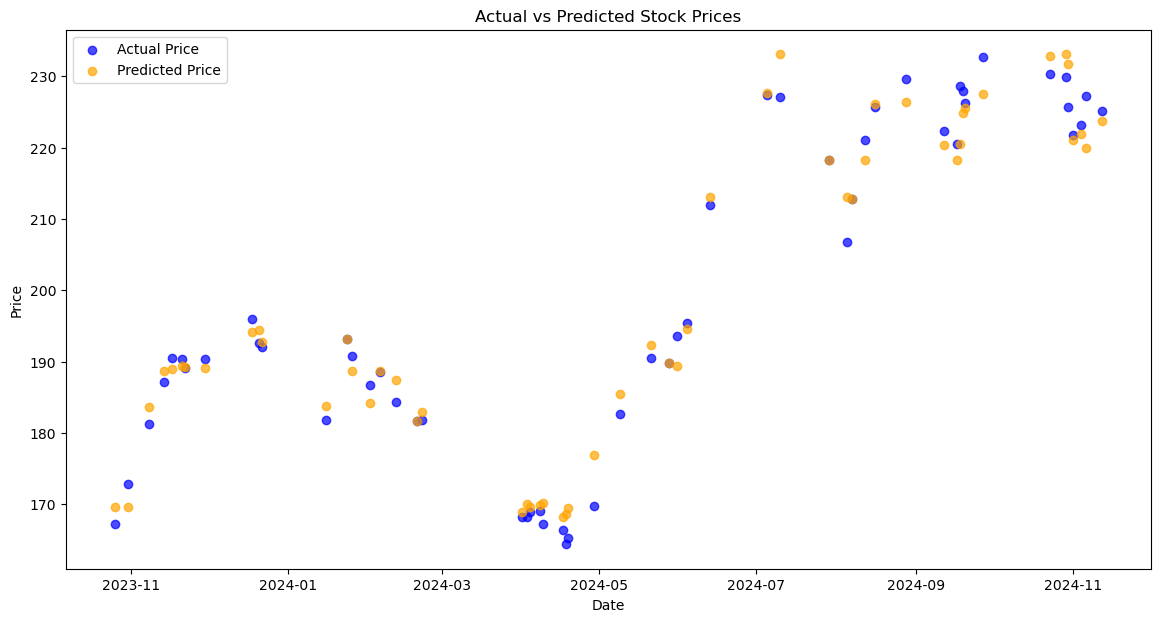

In [31]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, label='Actual Price', color='blue', alpha=0.7)  # Plot actual prices as points
plt.scatter(y_test.index, y_pred, label='Predicted Price', color='orange', alpha=0.7)  # Plot predicted prices as points
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()